<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mehdi Abbaszadeh

**Student ID**: 99106403





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [2]:
# import necessary libraries
use_gpu = False 

if use_gpu:
    import cupy as np 
else:
    import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!
    def __init__(self, learning_rate=0.01, regLambda = 0.01, num_iterations=100):
        self.learning_rate = learning_rate
        self.regLambda = regLambda
        self.num_iterations = num_iterations
        self.theta = None
        self.loss_vector = np.array([])

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss_function(self, X, y):
        m, n = X.shape
        h = self.sigmoid(np.dot(X, self.theta))
        regularization_term = self.regLambda/(2*m) * np.sum(np.square(self.theta[1:]))
        loss = -1/m * (np.dot(y.T, np.log(h + 1e-10)) + np.dot((1 - y).T, np.log(1 - h + 1e-10))) + regularization_term
        return loss.item()
    
    def gradient_descent(self, X, y):
        m, n = X.shape
        h = self.sigmoid(np.dot(X, self.theta))
        regularization_term = self.regLambda/m * np.concatenate(([0], self.theta[1:])) 
        grad = 1/m * np.dot(X.T, (h - y)) + regularization_term
        return grad
    
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        _, n = X.shape
        self.theta = np.zeros(n, )
        for _ in np.arange(self.num_iterations):
            self.theta -= self.learning_rate*self.gradient_descent(X, y)
            tmp_loss = self.loss_function(X, y)
            self.loss_vector = np.append(self.loss_vector, tmp_loss)
            
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        tmp = X.reshape(X.shape[0], len(self.theta))@self.theta.reshape(len(self.theta), 1)
        y = self.sigmoid(tmp) > 0.5
        return y

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [3]:
# Your code goes here!
dataset = pd.read_csv('Q2/Logistic_question.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

# add a column of 1's to the training data coressponding to Bias in weights vector

# making the target column binary
Y = Y > 0.5

# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

# normalize the data
mean_tr = np.mean(X, axis=0)
std_tr = np.std(X, axis=0)
X_train = (X_train - mean_tr)/std_tr

mean_test = np.mean(X_test, axis=0)
std_test = np.std(X_test, axis=0)
X_test = (X_test - mean_test)/std_test

# instantiate the MyLogisticRegression class
my_model = MyLogisticRegression()
my_model.fit(X_train, y_train)
# plt.plot(np.arange(1, len(my_model.loss_vector) + 1), my_model.loss_vector)
# plt.show()
y_pred = my_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy = {accuracy}')
print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'f1 = {f1}')

accuracy = 0.925
precision = 0.971830985915493
recall = 0.9452054794520548
f1 = 0.9583333333333334


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

**1.Accuracy:**
Accuracy measures the proportion of correctly classified instances out of the total number of instances.
Accuracy is useful when the class distribution is balanced and the cost of misclassification for both classes is similar.However, accuracy can be misleading when the class distribution is imbalanced, as it may overestimate the performance of the model when one class dominates the dataset

**2.Precision:**
Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
Precision is useful when the cost of false positives (incorrectly predicting the positive class) is high. It emphasizes the model's ability to avoid false positives.
For example, in spam email detection, precision is important because misclassifying non-spam emails as spam (false positives) can be disruptive to users.

**3.Recall:**
Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset.
Recall is useful when the cost of false negatives (incorrectly predicting the negative class) is high. It emphasizes the model's ability to capture all positive instances.
For example, in medical diagnosis, recall is important because missing positive cases (false negatives) can be life-threatening if not detected.

**4.F1 Score:**
The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.
The F1 score is useful when there is an uneven class distribution or when both false positives and false negatives are costly.
It is particularly valuable when you need to consider both precision and recall simultaneously and want a single metric to evaluate the model's performance comprehensively.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [4]:
# Your code goes here!
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy = {accuracy}')
print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'f1 = {f1}')

accuracy = 0.95
precision = 0.96
recall = 0.9863013698630136
f1 = 0.9729729729729729


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**
as you see, my function has better performance based on the metric precision. but in other three metrics the performance of built-in function is better than my function.
When comparing a self-implemented logistic regression model with the built-in logistic regression model from scikit-learn, there are several factors to consider including performance, ease of use, and flexibility
**1.Performance:**
Performance can be evaluated in terms of accuracy, training time, and memory usage.
Scikit-learn's built-in logistic regression model is optimized for performance and efficiency, often outperforming self-implemented models, especially for large datasets.
Self-implemented models may not be as optimized and may suffer from performance issues, particularly when dealing with large-scale datasets.

**2.Parameters:**
Scikit-learn's logistic regression implementation offers several parameters that can be tuned to optimize model performance:
penalty: Specifies the norm used in the penalization (L1 or L2 regularization).
C: Inverse of regularization strength; smaller values specify stronger regularization.
solver: Algorithm to use for optimization (e.g., 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga').
max_iter: Maximum number of iterations for optimization algorithms.
class_weight: Weights associated with classes to address class imbalance.
These parameters can significantly affect the model's performance and generalization ability:
Choosing the right regularization strength (C) helps prevent overfitting.
The choice of solver and maximum number of iterations can impact convergence speed and memory usage.
Setting appropriate class weights is crucial for handling imbalanced datasets.

**3.Ease of use and flexibility:**
Scikit-learn's logistic regression implementation provides a user-friendly interface and seamlessly integrates with other scikit-learn functionalities (e.g., cross-validation, pipeline).
Self-implemented models require more effort to develop, debug, and maintain. They may lack some advanced features available in scikit-learn, such as built-in cross-validation and hyperparameter tuning.
However, self-implemented models offer greater flexibility and customization, allowing researchers to experiment with different optimization algorithms, regularization techniques, and custom loss functions

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [5]:
# import necessary libraries
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore")

class MyMultinomialLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!
    def __init__(self, learning_rate=0.01, regLambda = 0.01, num_iterations=100):
        self.learning_rate = learning_rate
        self.regLambda = regLambda
        self.num_iterations = num_iterations
        self.regLambda = regLambda
        self.theta = None
        
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def loss_function(self, X, y):
        m = len(y)
        h = self.softmax(np.dot(X, self.theta))
        cross_entropy_loss = -1/m * np.sum(np.log(h[np.arange(m), y]))
        regularization_term = 0.5 * self.regLambda * np.sum(self.theta ** 2)/m
        cost = cross_entropy_loss + regularization_term
        return cost
    
    def gradient_descent(self, X, y):
        m, n = X.shape
        num_classes = len(np.unique(y))
        self.theta = np.zeros((n, num_classes))
        y_one_hot = np.eye(num_classes)[y]
        for _ in range(self.num_iterations):
            h = self.softmax(np.dot(X, self.theta))
            gradient = 1/m * np.dot(X.T, (h - y_one_hot))
            gradient += 1/m*self.regLambda * self.theta  
            self.theta -= self.learning_rate * gradient
            
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.gradient_descent(X, y)
        
    def predict_proba(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return self.softmax(np.dot(X, self.theta))

    def predict(self, X):
        # Predict class labels
        return np.argmax(self.predict_proba(X), axis=1)    

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

results for i = 2
accuracy = 1.0
precision = 1.0
recall = 1.0
f1 = 1.0
*******************************
results for i = 3
accuracy = 0.8375
precision = 0.8584300451321727
recall = 0.8375
f1 = 0.8415086423896627
*******************************
results for i = 4
accuracy = 0.725
precision = 0.6458802376485304
recall = 0.725
f1 = 0.6792413853727144
*******************************
results for i = 5
accuracy = 0.55
precision = 0.5803646318732525
recall = 0.55
f1 = 0.4961309523809523
*******************************
results for i = 6
accuracy = 0.5375
precision = 0.5328125
recall = 0.5375
f1 = 0.4760957792207792
*******************************
results for i = 7
accuracy = 0.4125
precision = 0.35320881226053635
recall = 0.4125
f1 = 0.3300271739130435
*******************************
results for i = 8
accuracy = 0.3625
precision = 0.42699362041467304
recall = 0.3625
f1 = 0.2709020301312391
*******************************
results for i = 9
accuracy = 0.3
precision = 0.2784137426900585
recall = 0.3

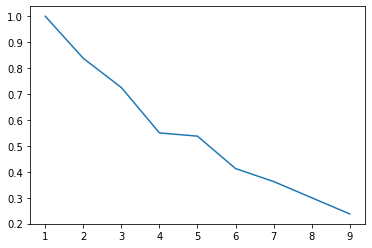

In [6]:
# Your code goes here!
dataset = pd.read_csv('Q2/Logistic_question.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

levels = np.arange(2, 11)
index = 0
accuracy_vec = np.zeros((9, 1))

for i in levels:
    Y_new = np.digitize(Y, np.linspace(Y.min(), Y.max(), i)) - 1  # levels : [0, i - 1]
    
    # train_test split
    X_train, X_test, y_train, y_test = train_test_split(X, Y_new, test_size=0.2, random_state = 0)

    # normalize the data
    mean_tr = np.mean(X, axis=0)
    std_tr = np.std(X, axis=0)
    X_train = (X_train - mean_tr)/std_tr

    mean_test = np.mean(X_test, axis=0)
    std_test = np.std(X_test, axis=0)
    X_test = (X_test - mean_test)/std_test
    
    # instantiate the MyLogisticRegression class
    my_model = MyMultinomialLogisticRegression()
    my_model.fit(X_train, y_train)
    y_pred = my_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracy_vec[index] = accuracy
    index += 1

    # printing the results
    print(f'results for i = {i}')
    print(f'accuracy = {accuracy}')
    print(f'precision = {precision}')
    print(f'recall = {recall}')
    print(f'f1 = {f1}')
    print('*******************************')
    

plt.plot(np.arange(1, index+1), accuracy_vec)    
plt.show()

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**
as you see the previous plot, the model performs best for i = 2. because ....

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

In [8]:
# Your code goes here!
# reading the data
adult = pd.read_csv('Q2/adult.csv')

for i,j in zip(adult.columns,(adult.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' null entries')
x = (adult.values.astype(str) == '?').sum(axis = 0).sum()
print(f'total number of null entries = {x}')        

workclass: 2799 null entries
occupation: 2809 null entries
native-country: 857 null entries
total number of null entries = 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

There are different ways to handle missing values in Numeric data and Categorical data:

**1. Mean/Median/Mode Imputation:**
Replace null values with the mean, median, or mode of the column.
This method is simple and effective when the null values are missing at random and don’t have a significant impact on the overall distribution of the data.

**2.Forward Fill:**
The forwardfill() method is used to fill in missing values in a DataFrame or Series with the previous valid observation.

**3. Backward Fill:**
The backfill() method is used to fill in missing values in a DataFrame or Series with the next valid observation.

**4. Interpolation:**
Interpolation methods estimate missing values based on the values of neighboring data points. Common interpolation methods include linear interpolation and polynomial interpolation.
Using Interpolate method for a column in a dataset.

**8. Machine Learning Model:**
You can use machine learning models to predict missing values based on the other features in your dataset.
This can be a more sophisticated approach and might require splitting your data into two sets: one with non-null values for training and one with null values for prediction.

**6. Replace with Constant Values:**
Replace null values with a specific constant value that is meaningful for your dataset. For example, you might use 0 or -1 if it makes sense in your context.
Replacing null values with a constant for a specific column.

my method:

**Task:** Handle null entries using your best method.

In [12]:
# Your code goes here!
# adult.replace('?', pd.NA, inplace=True)
# adult.dropna(inplace=True)

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [10]:
# Your code goes here!
X = adult.iloc[:, :-1]
Y = adult.iloc[:, -1]

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# extract categorical_features
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# scaling function
numeric_transformer = StandardScaler()
# categorical to numeric function
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# pipeline for gridsearchcv function
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Define parameters grid for grid search
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga'],
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# fitting using gridsearch
grid_search.fit(X_train, y_train)

# driving the best model
best_model = grid_search.best_estimator_

# parameter of the best model
print("Best Parameters:", grid_search.best_params_)

# train and test accuracy of the best model
train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Train Accuracy:{train_accuracy}")
print(f"Test Accuracy:{test_accuracy}")

Best Parameters: {'classifier__C': 0.01, 'classifier__solver': 'liblinear'}
Train Accuracy:0.848246123227465
Test Accuracy:0.83681592039801


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [171]:
# Your code goes here!
print(categorical_features)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [ ]:
# Your code goes here!


**Question:** Analyze the results.

**Your Answer:**